<a href="https://colab.research.google.com/github/rajatDpatil/Satellite-Telemetry-Health-Alert-Prediction-System/blob/main/Satellite_Health_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)

rows = 120
satellites = ["SAT_MCF_01", "SAT_MCF_02", "SAT_MCF_03", "SAT_MCF_04"]
qualities = ["good", "average", "poor"]

start_time = datetime(2025, 1, 1, 10, 0, 0)

data = []

for i in range(rows):
    timestamp = start_time + timedelta(minutes=5*i)
    satellite_id = np.random.choice(satellites)

    signal_strength = np.random.normal(-75, 8)        # dBm
    temperature = np.random.normal(52, 7)              # Celsius
    voltage = np.random.normal(3.35, 0.08)             # Volts
    packet_loss = abs(np.random.normal(3.0, 2.0))      # %
    delay = abs(np.random.normal(160, 40))              # ms

    # Signal quality (raw categorical)
    if signal_strength > -70:
        signal_quality = "good"
    elif signal_strength > -80:
        signal_quality = "average"
    else:
        signal_quality = "poor"

    # Alert logic
    alert_flag = int(
        signal_strength < -80 or
        temperature > 60 or
        packet_loss > 5 or
        delay > 200
    )

    # Health score calculation
    health_score = 100
    health_score -= max(0, (-signal_strength - 65)) * 0.7
    health_score -= max(0, (temperature - 45)) * 0.8
    health_score -= packet_loss * 2
    health_score -= max(0, (delay - 120)) * 0.1

    health_score = int(np.clip(health_score, 10, 100))

    operator_notes = np.random.choice([
        "normal operation",
        "minor fluctuation observed",
        "signal variation noticed",
        "monitor closely",
        "communication unstable"
    ])

    data.append([
        timestamp.strftime("%Y-%m-%d %H:%M:%S"),
        satellite_id,
        round(signal_strength, 2),
        signal_quality,
        round(temperature, 2),
        round(voltage, 2),
        round(packet_loss, 2),
        int(delay),
        operator_notes,
        alert_flag,
        health_score
    ])

columns = [
    "timestamp",
    "satellite_id",
    "signal_strength_dbm",
    "signal_quality",
    "temperature_c",
    "voltage_v",
    "packet_loss_pct",
    "comm_delay_ms",
    "operator_notes",
    "alert_flag",
    "health_score"
]

df = pd.DataFrame(data, columns=columns)

df.head()


,timestamp,satellite_id,signal_strength_dbm,signal_quality,temperature_c,voltage_v,packet_loss_pct,comm_delay_ms,operator_notes,alert_flag,health_score
0,2025-01-01 10:00:00,SAT_MCF_03,-79.40,average,55.61,3.39,5.74,123,signal variation noticed,1,69
1,2025-01-01 10:05:00,SAT_MCF_04,-75.99,average,45.80,3.32,2.03,166,monitor closely,0,82
2,2025-01-01 10:10:00,SAT_MCF_02,-79.65,average,48.32,3.30,1.15,55,normal operation,0,84
3,2025-01-01 10:15:00,SAT_MCF_03,-67.40,good,44.91,3.38,1.18,103,signal variation noticed,0,95
4,2025-01-01 10:20:00,SAT_MCF_04,-54.52,good,54.76,3.36,1.97,135,communication unstable,0,86


In [3]:
df

,timestamp,satellite_id,signal_strength_dbm,signal_quality,temperature_c,voltage_v,packet_loss_pct,comm_delay_ms,operator_notes,alert_flag,health_score
0,2025-01-01 10:00:00,SAT_MCF_03,-79.40,average,55.61,3.39,5.74,123,signal variation noticed,1,69
1,2025-01-01 10:05:00,SAT_MCF_04,-75.99,average,45.80,3.32,2.03,166,monitor closely,0,82
2,2025-01-01 10:10:00,SAT_MCF_02,-79.65,average,48.32,3.30,1.15,55,normal operation,0,84
3,2025-01-01 10:15:00,SAT_MCF_03,-67.40,good,44.91,3.38,1.18,103,signal variation noticed,0,95
4,2025-01-01 10:20:00,SAT_MCF_04,-54.52,good,54.76,3.36,1.97,135,communication unstable,0,86
...,...,...,...,...,...,...,...,...,...,...,...
115,2025-01-01 19:35:00,SAT_MCF_04,-81.22,poor,60.56,3.18,1.46,135,communication unstable,1,71
116,2025-01-01 19:40:00,SAT_MCF_04,-74.21,average,51.09,3.39,0.89,145,signal variation noticed,0,84
117,2025-01-01 19:45:00,SAT_MCF_04,-76.83,average,63.52,3.27,1.69,122,minor fluctuation observed,1,73
118,2025-01-01 19:50:00,SAT_MCF_03,-64.09,good,57.39,3.38,4.74,181,communication unstable,0,74


In [4]:
df.to_csv("telemetry_data.csv", index=False)
print("telemetry_data.csv saved successfully!")


telemetry_data.csv saved successfully!


In [6]:

df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            120 non-null    object 
 1   satellite_id         120 non-null    object 
 2   signal_strength_dbm  120 non-null    float64
 3   signal_quality       120 non-null    object 
 4   temperature_c        120 non-null    float64
 5   voltage_v            120 non-null    float64
 6   packet_loss_pct      120 non-null    float64
 7   comm_delay_ms        120 non-null    int64  
 8   operator_notes       120 non-null    object 
 9   alert_flag           120 non-null    int64  
 10  health_score         120 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 10.4+ KB


,signal_strength_dbm,temperature_c,voltage_v,packet_loss_pct,comm_delay_ms,alert_flag,health_score
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000
mean,-74.410667,52.441500,3.360583,3.218583,157.058333,0.508333,75.65000
std,7.217908,7.225489,0.080265,1.711987,44.137732,0.502027,9.12808
min,-92.570000,36.020000,3.150000,0.190000,50.000000,0.000000,50.00000
25%,-79.440000,47.797500,3.307500,1.927500,129.500000,0.000000,69.00000
50%,-74.195000,51.885000,3.370000,3.185000,157.000000,1.000000,76.50000
75%,-69.715000,57.402500,3.410000,4.425000,181.250000,1.000000,83.00000
max,-54.520000,74.220000,3.530000,7.630000,314.000000,1.000000,95.00000


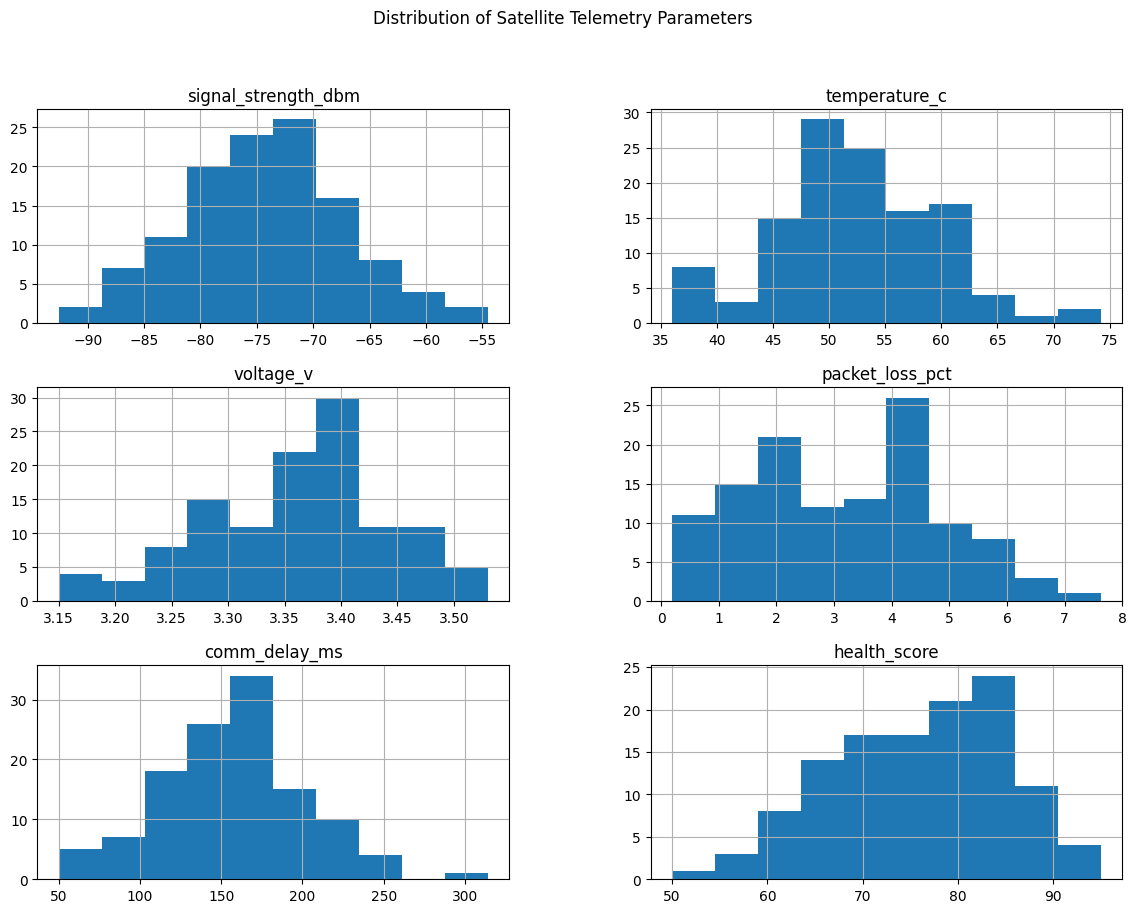

In [7]:
import matplotlib.pyplot as plt

numeric_cols = [
    "signal_strength_dbm",
    "temperature_c",
    "voltage_v",
    "packet_loss_pct",
    "comm_delay_ms",
    "health_score"
]

df[numeric_cols].hist(figsize=(14, 10))
plt.suptitle("Distribution of Satellite Telemetry Parameters")
plt.show()


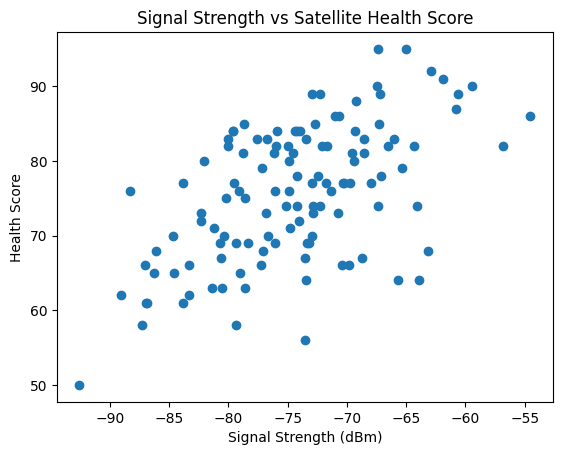

In [8]:
plt.figure()
plt.scatter(df["signal_strength_dbm"], df["health_score"])
plt.xlabel("Signal Strength (dBm)")
plt.ylabel("Health Score")
plt.title("Signal Strength vs Satellite Health Score")
plt.show()

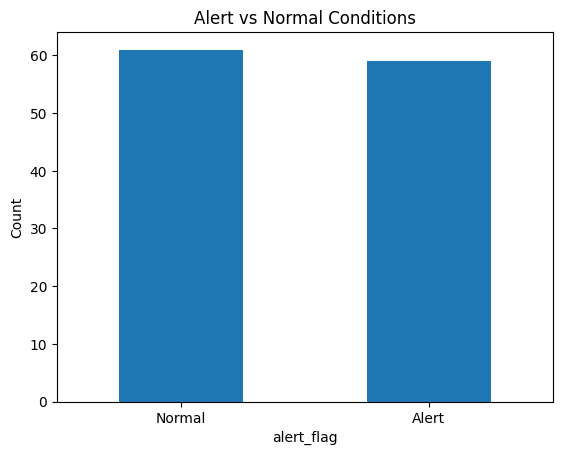

In [9]:
alert_counts = df["alert_flag"].value_counts()

plt.figure()
alert_counts.plot(kind="bar")
plt.xticks([0, 1], ["Normal", "Alert"], rotation=0)
plt.ylabel("Count")
plt.title("Alert vs Normal Conditions")
plt.show()


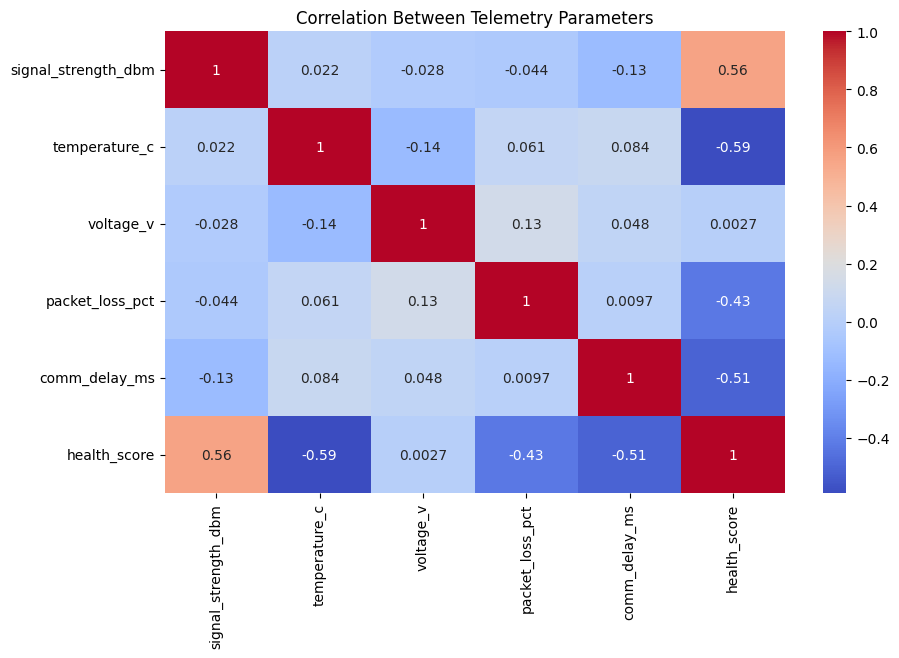

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Telemetry Parameters")
plt.show()

In [11]:
df_clean = df.copy()
df_clean.drop(columns=["operator_notes"], inplace=True)
df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"])
df_clean["hour"] = df_clean["timestamp"].dt.hour
df_clean.drop(columns=["timestamp"], inplace=True)

df_clean.head()


,satellite_id,signal_strength_dbm,signal_quality,temperature_c,voltage_v,packet_loss_pct,comm_delay_ms,alert_flag,health_score,hour
0,SAT_MCF_03,-79.40,average,55.61,3.39,5.74,123,1,69,10
1,SAT_MCF_04,-75.99,average,45.80,3.32,2.03,166,0,82,10
2,SAT_MCF_02,-79.65,average,48.32,3.30,1.15,55,0,84,10
3,SAT_MCF_03,-67.40,good,44.91,3.38,1.18,103,0,95,10
4,SAT_MCF_04,-54.52,good,54.76,3.36,1.97,135,0,86,10


In [12]:
df_clean = pd.get_dummies(
    df_clean,
    columns=["satellite_id", "signal_quality"],
    drop_first=True
)

df_clean.head()


,signal_strength_dbm,temperature_c,voltage_v,packet_loss_pct,comm_delay_ms,alert_flag,health_score,hour,satellite_id_SAT_MCF_02,satellite_id_SAT_MCF_03,satellite_id_SAT_MCF_04,signal_quality_good,signal_quality_poor
0,-79.40,55.61,3.39,5.74,123,1,69,10,False,True,False,False,False
1,-75.99,45.80,3.32,2.03,166,0,82,10,False,False,True,False,False
2,-79.65,48.32,3.30,1.15,55,0,84,10,True,False,False,False,False
3,-67.40,44.91,3.38,1.18,103,0,95,10,False,True,False,True,False
4,-54.52,54.76,3.36,1.97,135,0,86,10,False,False,True,True,False


In [13]:
# Targets
X = df_clean.drop(columns=["alert_flag", "health_score"])
y_alert = df_clean["alert_flag"]
y_health = df_clean["health_score"]

X.shape, y_alert.shape, y_health.shape


((120, 11), (120,), (120,))

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_alert_train, y_alert_test = train_test_split(
    X_scaled, y_alert, test_size=0.25, random_state=42
)

_, _, y_health_train, y_health_test = train_test_split(
    X_scaled, y_health, test_size=0.25, random_state=42
)

In [16]:
from sklearn.linear_model import LogisticRegression

alert_model = LogisticRegression(max_iter=1000)
alert_model.fit(X_train, y_alert_train)


LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_alert_pred = alert_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_alert_test, y_alert_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_alert_test, y_alert_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.94      0.83      0.88        18

    accuracy                           0.87        30
   macro avg       0.86      0.88      0.86        30
weighted avg       0.88      0.87      0.87        30

Confusion Matrix:
[[11  1]
 [ 3 15]]


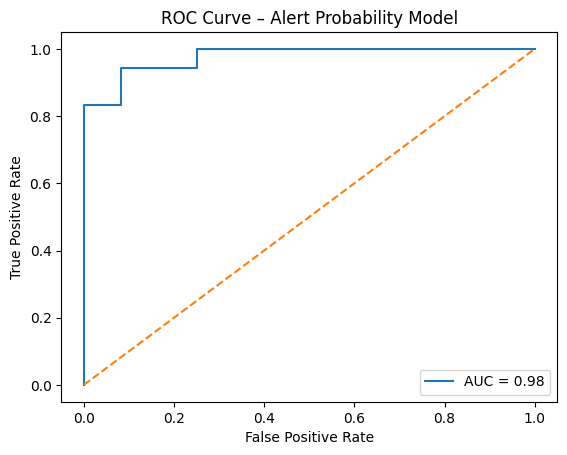

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_alert_prob = alert_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_alert_test, y_alert_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Alert Probability Model")
plt.legend()
plt.show()


In [19]:
sample_probs = alert_model.predict_proba(X_test[:5])[:, 1]
sample_probs

array([0.79985247, 0.92214165, 0.04803067, 0.75686451, 0.79942303])

In [20]:
from sklearn.ensemble import RandomForestRegressor

health_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

health_model.fit(X_train, y_health_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_health_pred = health_model.predict(X_test)

mae = mean_absolute_error(y_health_test, y_health_pred)
rmse = np.sqrt(mean_squared_error(y_health_test, y_health_pred))

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")


MAE  : 3.33
RMSE : 4.12


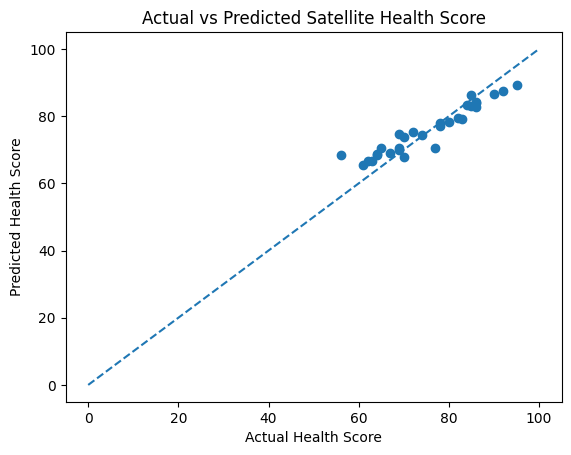

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_health_test, y_health_pred)
plt.plot([0, 100], [0, 100], linestyle="--")
plt.xlabel("Actual Health Score")
plt.ylabel("Predicted Health Score")
plt.title("Actual vs Predicted Satellite Health Score")
plt.show()


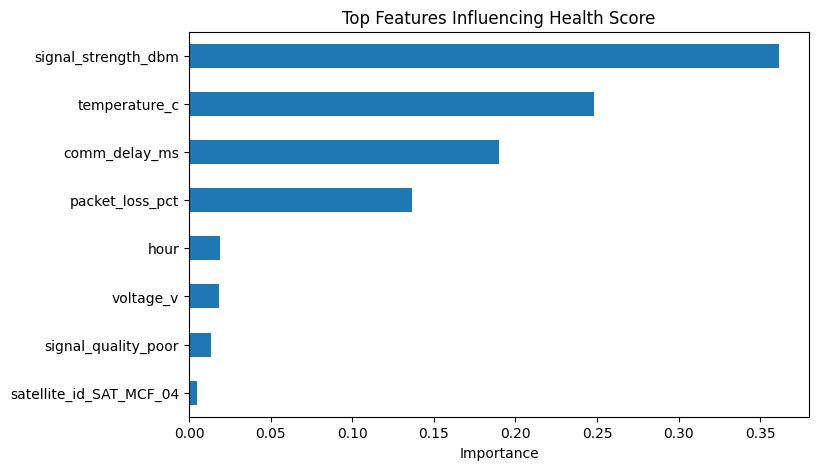

In [23]:
feature_importance = pd.Series(
    health_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feature_importance.head(8).plot(kind="barh")
plt.xlabel("Importance")
plt.title("Top Features Influencing Health Score")
plt.gca().invert_yaxis()
plt.show()


In [24]:
def predict_satellite_status(input_data):
    """
    input_data: pandas DataFrame with one row of telemetry values
    """

    # Predict alert risk
    alert_prob = alert_model.predict_proba(input_data)[0][1]
    alert_status = " High Risk" if alert_prob > 0.6 else " Normal"

    # Predict health score
    health_score = health_model.predict(input_data)[0]
    health_score = max(0, min(100, health_score))  # clamp

    # Health interpretation
    if health_score > 80:
        health_status = "Excellent"
    elif health_score > 60:
        health_status = "Good"
    elif health_score > 40:
        health_status = "Moderate"
    else:
        health_status = "Critical"

    return {
        "Alert Probability": round(alert_prob, 2),
        "Alert Status": alert_status,
        "Health Score": round(health_score, 1),
        "Health Condition": health_status
    }


In [54]:
import pandas as pd

sample_input = pd.DataFrame([X_test[0]], columns=X.columns)

prediction = predict_satellite_status(sample_input)

prediction


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


{'Alert Probability': np.float64(0.8),
 'Alert Status': ' High Risk',
 'Health Score': np.float64(69.1),
 'Health Condition': 'Good'}